In [1]:
# Intraday Gamma Scalping SPY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import requests
import ivolatility as ivol
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_full = pd.read_csv('Input/spy_2024-04-29_8.csv', sep=',')

In [8]:
# venta de put 470
fichero= 'spy_2024-04-29_8.csv'

df_full = pd.read_csv(f'Input/{fichero}', sep=',')
columns_to_keep = ['timestamp','optionStrike', 'optionType', 'optionBidPrice', 'optionAskPrice', 
                   'underlyingPrice','optionIv', 'optionDelta']
df_P470= df_full[columns_to_keep]
df_P470.head()

,timestamp,optionStrike,optionType,optionBidPrice,optionAskPrice,underlyingPrice,optionIv,optionDelta
0,2024-04-29 09:30:00,470.0,P,2.23,2.26,508.2600,0.1773,-0.11859
1,2024-04-29 09:31:00,470.0,P,2.00,2.03,510.1400,0.1808,-0.10848
2,2024-04-29 09:32:00,470.0,P,1.98,2.01,510.3403,0.1810,-0.10747
3,2024-04-29 09:33:00,470.0,P,1.96,1.99,510.6350,0.1812,-0.10639
4,2024-04-29 09:34:00,470.0,P,1.97,2.00,510.7000,0.1816,-0.10662


In [9]:
# recompra de put 465
fichero= 'spy_2024-04-29_9.csv'

df_full = pd.read_csv(f'Input/{fichero}', sep=',')
columns_to_keep = ['timestamp','optionStrike', 'optionType', 'optionBidPrice', 'optionAskPrice', 
                   'underlyingPrice','optionIv', 'optionDelta']
df_P465= df_full[columns_to_keep]
df_P465.head()

,timestamp,optionStrike,optionType,optionBidPrice,optionAskPrice,underlyingPrice,optionIv,optionDelta
0,2024-04-29 09:30:00,465.0,P,1.88,1.91,508.2600,0.1841,-0.09984
1,2024-04-29 09:31:00,465.0,P,1.68,1.71,510.1400,0.1875,-0.09103
2,2024-04-29 09:32:00,465.0,P,1.67,1.70,510.3403,0.1879,-0.09041
3,2024-04-29 09:33:00,465.0,P,1.65,1.68,510.6350,0.1880,-0.08939
4,2024-04-29 09:34:00,465.0,P,1.66,1.68,510.7000,0.1883,-0.08949


In [15]:
# Venta de Call
fichero= 'spy_2024-04-29_6.csv'

df_full = pd.read_csv(f'Input/{fichero}', sep=',')
columns_to_keep = ['timestamp','optionStrike', 'optionType', 'optionBidPrice', 'optionAskPrice', 
                   'underlyingPrice','optionIv', 'optionDelta']
df_C541= df_full[columns_to_keep]
df_C541.head()

,timestamp,optionStrike,optionType,optionBidPrice,optionAskPrice,underlyingPrice,optionIv,optionDelta
0,2024-04-29 09:30:00,541.0,C,1.34,1.37,508.2600,0.1118,0.11910
1,2024-04-29 09:31:00,541.0,C,1.50,1.53,510.1400,0.1128,0.13153
2,2024-04-29 09:32:00,541.0,C,1.53,1.56,510.3403,0.1127,0.13369
3,2024-04-29 09:33:00,541.0,C,1.57,1.60,510.6350,0.1127,0.13639
4,2024-04-29 09:34:00,541.0,C,1.58,1.61,510.7000,0.1128,0.13700


In [12]:
# Recompra de Call
fichero= 'spy_2024-04-29_7.csv'

df_full = pd.read_csv(f'Input/{fichero}', sep=',')
columns_to_keep = ['timestamp','optionStrike', 'optionType', 'optionBidPrice', 'optionAskPrice', 
                   'underlyingPrice','optionIv', 'optionDelta']
df_C546= df_full[columns_to_keep]
df_C546.head()

,timestamp,optionStrike,optionType,optionBidPrice,optionAskPrice,underlyingPrice,optionIv,optionDelta
0,2024-04-29 09:30:00,546.0,C,0.82,0.84,508.2600,0.1098,0.08031
1,2024-04-29 09:31:00,546.0,C,0.92,0.94,510.1400,0.1107,0.08917
2,2024-04-29 09:32:00,546.0,C,0.94,0.96,510.3403,0.1106,0.09080
3,2024-04-29 09:33:00,546.0,C,0.96,0.99,510.6350,0.1106,0.09277
4,2024-04-29 09:34:00,546.0,C,0.97,0.99,510.7000,0.1106,0.09314


In [55]:
# Create the iron_condor DataFrame with the necessary options data
iron_condor = pd.DataFrame({
    'P465_optionAskPrice': df_P465['optionAskPrice'],
    'P470_optionBidPrice': df_P470['optionBidPrice'],
    'C541_optionBidPrice': df_C541['optionBidPrice'],
    'C546_optionAskPrice': df_C546['optionAskPrice']
})

# Calculate the put spread: sell P470 - buy P465
iron_condor['Put_Spread'] = iron_condor['P470_optionBidPrice'] - iron_condor['P465_optionAskPrice']

# Calculate the call spread: sell C541 - buy C546
iron_condor['Call_Spread'] = df_C541['optionBidPrice'] - df_C546['optionAskPrice']

# Calculate the total spread: put spread + call spread
iron_condor['Total_Spread'] = iron_condor['Put_Spread'] + iron_condor['Call_Spread']

# Add the underlying price from df_P470
iron_condor['Underlying_Price'] = round(df_P470['underlyingPrice'],1)

# Display the DataFrame
iron_condor.info()
iron_condor

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   P465_optionAskPrice  410 non-null    float64
 1   P470_optionBidPrice  410 non-null    float64
 2   C541_optionBidPrice  410 non-null    float64
 3   C546_optionAskPrice  410 non-null    float64
 4   Put_Spread           410 non-null    float64
 5   Call_Spread          410 non-null    float64
 6   Total_Spread         410 non-null    float64
 7   Underlying_Price     410 non-null    float64
dtypes: float64(8)
memory usage: 25.8 KB


,P465_optionAskPrice,P470_optionBidPrice,C541_optionBidPrice,C546_optionAskPrice,Put_Spread,Call_Spread,Total_Spread,Underlying_Price
0,1.91,2.23,1.34,0.84,0.32,0.50,0.82,508.3
1,1.71,2.00,1.50,0.94,0.29,0.56,0.85,510.1
2,1.70,1.98,1.53,0.96,0.28,0.57,0.85,510.3
3,1.68,1.96,1.57,0.99,0.28,0.58,0.86,510.6
4,1.68,1.97,1.58,0.99,0.29,0.59,0.88,510.7
...,...,...,...,...,...,...,...,...
405,1.63,1.91,1.37,0.85,0.28,0.52,0.80,510.1
406,1.63,1.91,1.37,0.85,0.28,0.52,0.80,510.1
407,1.63,1.91,1.37,0.85,0.28,0.52,0.80,510.1
408,1.63,1.91,1.37,0.85,0.28,0.52,0.80,510.1


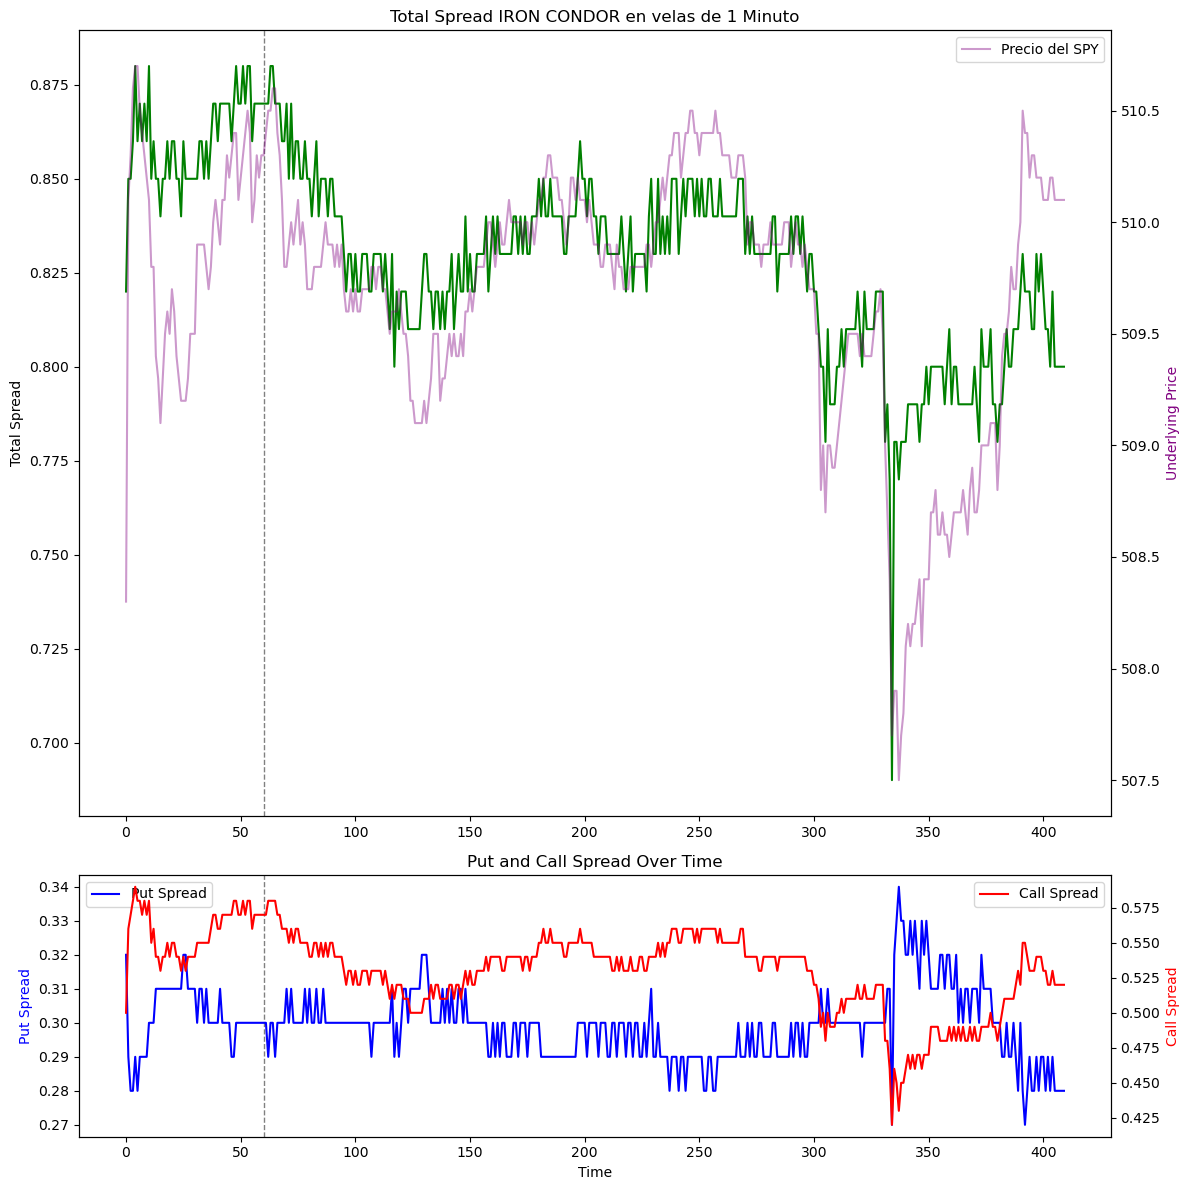

In [56]:
# Create a figure with specified figure size and two subplots (the second argument '2' is the number of rows)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [3, 1]})  # Adjust height ratios for better proportion

# Plotting Total Spread and Underlying Price on the first subplot (ax1)
ax1.plot(iron_condor.index, iron_condor['Total_Spread'], label='Benefico Iron Condor Spread', color='green')
ax2_right = ax1.twinx()  # Create a second y-axis for the underlying price on the first subplot
ax2_right.plot(iron_condor.index, iron_condor['Underlying_Price'], label='Precio del SPY', color='purple', linestyle='-', alpha=0.4)
ax2_right.set_ylabel('Underlying Price', color='purple')
ax2_right.legend(loc='upper right')
ax1.set_ylabel('Total Spread', color='black')
ax1.set_title('Total Spread IRON CONDOR en velas de 1 Minuto')

# Adding a vertical line at index 60
ax1.axvline(x=iron_condor.index[60], color='grey', linestyle='--', linewidth=1)  # Adjust color, linestyle, and linewidth as needed
ax2.axvline(x=iron_condor.index[60], color='grey', linestyle='--', linewidth=1)

# Plotting Put Spread on the left y-axis of the second subplot (ax2)
ax2.plot(iron_condor.index, iron_condor['Put_Spread'], label='Put Spread', color='blue')
ax2.set_xlabel('Time')
ax2.set_ylabel('Put Spread', color='blue')
ax2.set_title('Put and Call Spread Over Time')

# Plotting Call Spread on a separate right y-axis of the second subplot
ax3 = ax2.twinx()
ax3.plot(iron_condor.index, iron_condor['Call_Spread'], label='Call Spread', color='red')
ax3.set_ylabel('Call Spread', color='red')
ax3.legend(loc='upper right')
ax2.legend(loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust layout so that labels do not overlap
plt.show()